In [65]:
# Import useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import the machine learning models we will be using
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC



from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import loguniform


import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

* Age: The age of the students ranges from 15 to 18 years.
* Gender: Gender of the students, where 0 represents Male and 1 represents Female.
* Ethnicity: The ethnicity of the students, coded as follows:
0. Caucasian
1. African American
2. Asian
3. Other
* ParentalEducation: The education level of the parents, coded as follows:
0. None
1. High School
2. Some College
3. Bachelor's
4. Higher
* Study Habits
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
* Absences: Number of absences during the school year, ranging from 0 to 30.
* Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.
* Parental Involvement
ParentalSupport: The level of parental support, coded as follows:
0. None
1. Low
2. Moderate
3. High
4. Very High
* Extracurricular Activities
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
* Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
* Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
* Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
* Academic Performance
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
* Target Variable: Grade Class
GradeClass: Classification of students' grades based on GPA:
0. 'A' (GPA >= 3.5)
1. 'B' (3.0 <= GPA < 3.5)
2. 'C' (2.5 <= GPA < 3.0)
3. 'D' (2.0 <= GPA < 2.5)
4. 'F' (GPA < 2.0)

In [3]:
df = pd.read_csv("Student_performance_data _.csv")

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

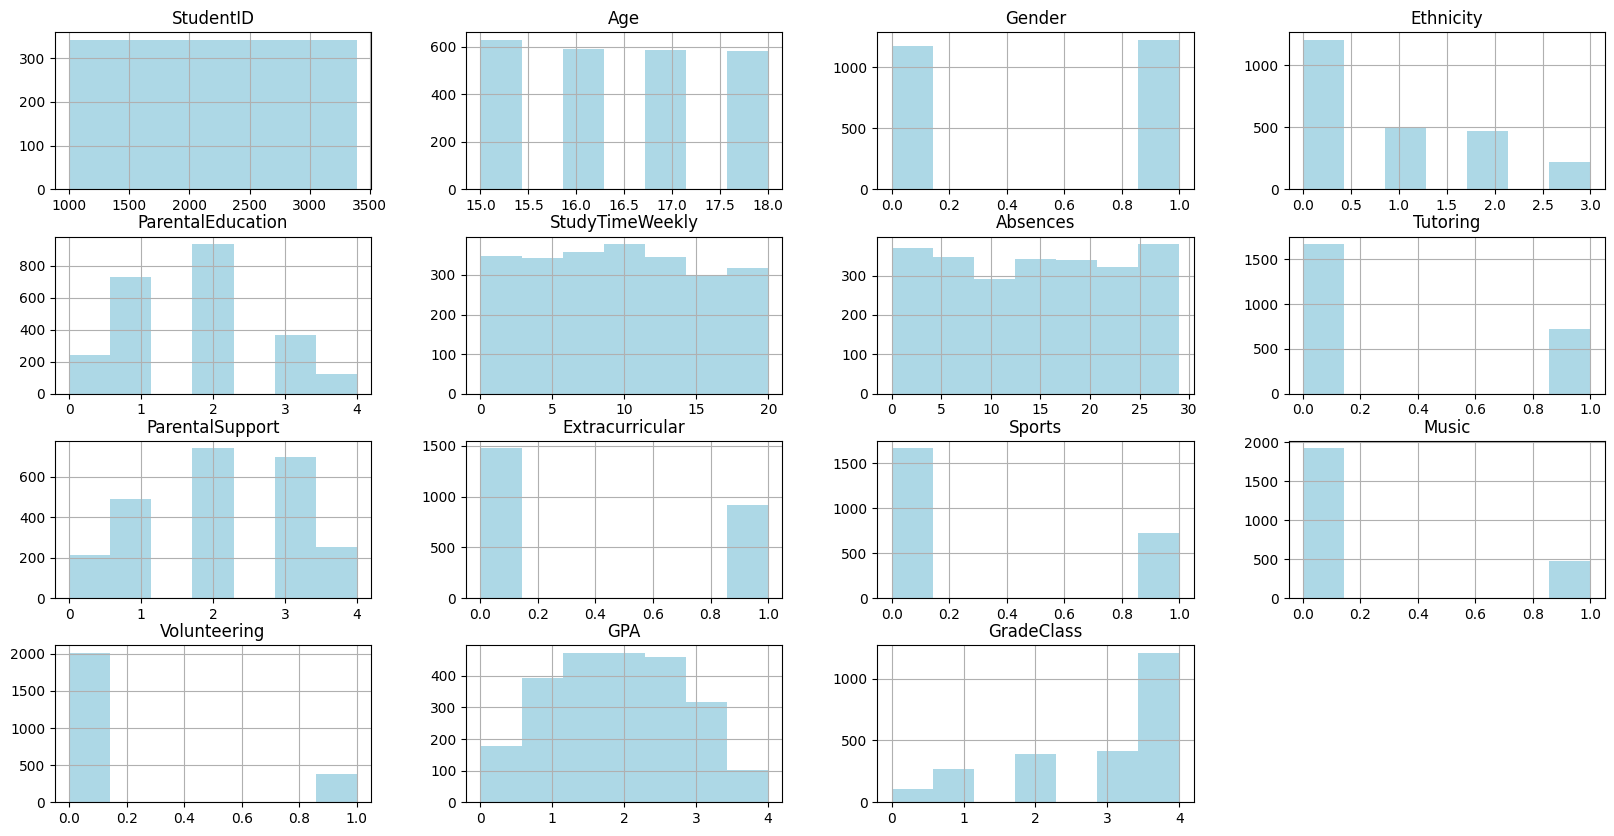

In [7]:
df.hist(figsize=(20,10), bins= 7, color = 'lightblue');

In [8]:
columns = list(df.columns)

categoric_col = []
numeric_col = []

for col in columns:
    if (len(df[col].unique()) > 6):
        numeric_col.append(col)
    else:
        categoric_col.append(col)

print(f'numerical feature: {numeric_col}')
print(f'categorical feature: {categoric_col}')

numerical feature: ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical feature: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [9]:
df[numeric_col] = df[numeric_col].astype('float64')

In [10]:
label_encoder = LabelEncoder()

for col in df[categoric_col]:
    df[col] = label_encoder.fit_transform(df[col])

scaler = StandardScaler()
df[numeric_col] = scaler.fit_transform(df[numeric_col])

In [11]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,-1.731327,2,1,0,2,1.780336,-0.890822,1,2,0,0,1,0,1.118086,2
1,-1.729879,3,0,0,1,0.997376,-1.717694,0,1,0,0,0,0,1.242374,1
2,-1.728430,0,0,2,3,-0.984045,1.353542,0,2,0,0,0,0,-1.960277,4
3,-1.726982,2,1,0,3,0.045445,-0.063951,0,3,1,0,0,0,0.161790,3
4,-1.725534,2,1,0,2,-0.902311,0.290422,1,3,0,0,0,0,-0.675573,4


In [12]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,1.725534,3,1,0,3,0.160762,-1.481445,0,4,1,0,0,0,1.693315,0
2388,1.726982,2,0,0,1,-0.387285,-1.245196,1,4,0,1,0,0,1.500565,4
2389,1.728430,1,1,0,2,-0.524895,0.644796,0,2,0,0,0,1,-0.834845,2
2390,1.729879,1,1,1,0,0.467950,0.290422,0,2,0,1,1,0,-0.112452,1
2391,1.731327,1,1,0,2,1.424008,-0.182076,0,2,0,0,0,1,0.255559,1


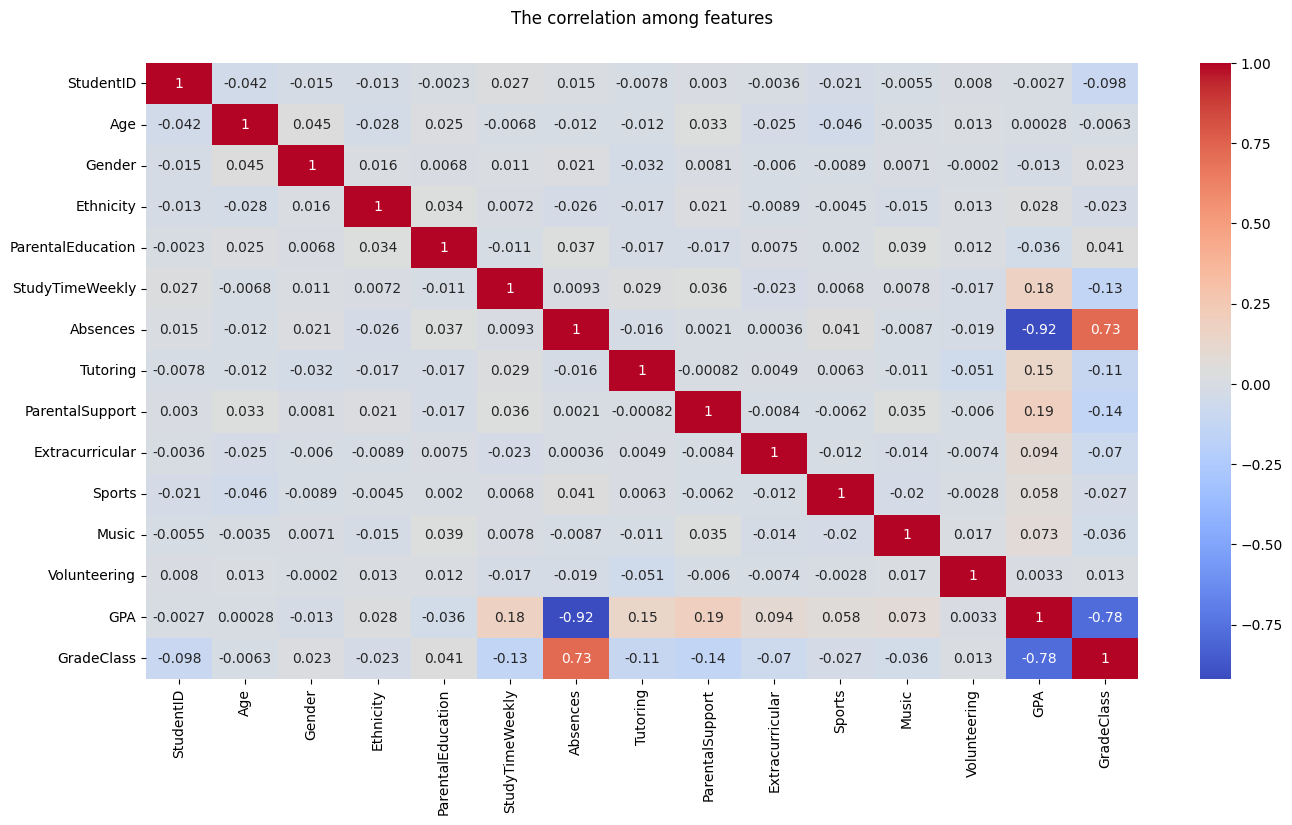

In [13]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features', y= 1.05)
plt.show();

In [21]:
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID', 'Age'])
# cols = ["Ethnicity", 'ParentalEducation']
# X = df[cols]
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)

In [15]:
clf = RandomForestClassifier(random_state= 42)
clf = clf.fit(X, y)

fimp = pd.Series(data = clf.feature_importances_, index = X.columns).sort_values(ascending= False)

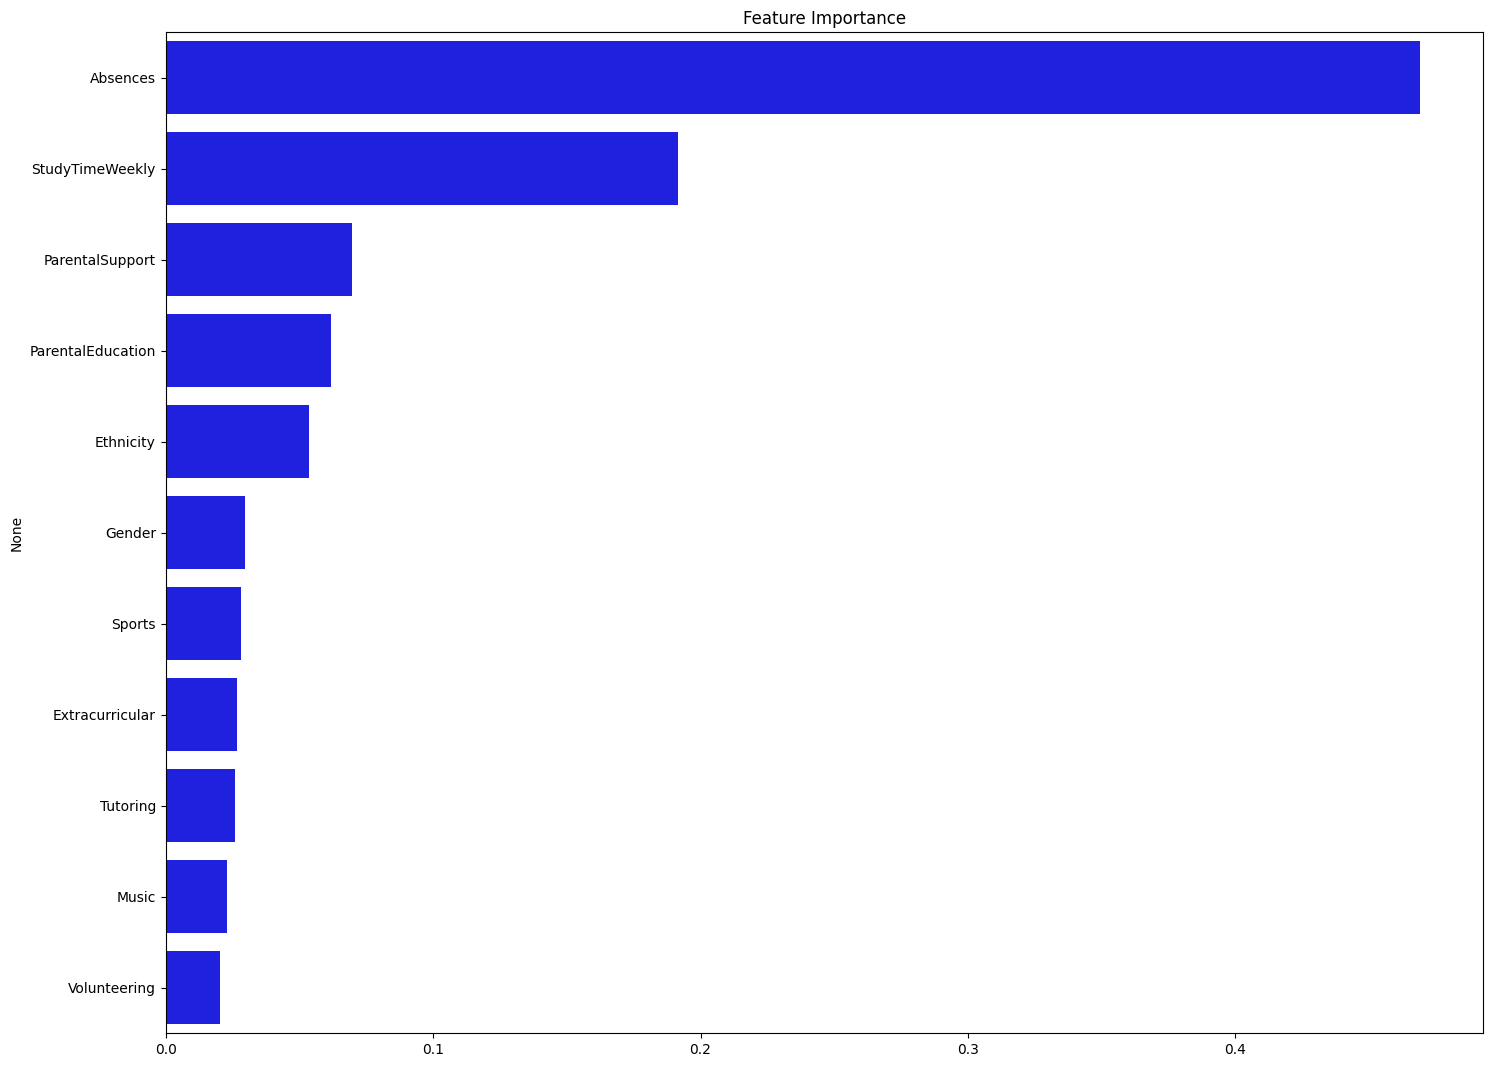

In [16]:
plt.figure(figsize = (17, 13))
plt.title("Feature Importance")
ax = sns.barplot(y = fimp.index, x = fimp.values, orient= 'h', color = 'blue')

Model with different input

In [26]:
cols1 = ["Absences", 'StudyTimeWeekly']
X1 = df[cols1]
y1 = df['GradeClass']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size= 0.2, random_state= 42)


In [27]:
# Dictionary of Classification models

classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGboost": XGBClassifier(),
    "Gradient": GradientBoostingClassifier(),
    "SVC": SVC(),
    "K Neighbors": KNeighborsClassifier()    
}

model_score = {}

# This is for X dataframe
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_score[name] = score
model_score



{'Logistic Regression': 0.732776617954071,
 'Decision Tree': 0.5970772442588727,
 'Random Forest': 0.7035490605427975,
 'AdaBoost': 0.6638830897703549,
 'XGboost': 0.6680584551148225,
 'Gradient': 0.6868475991649269,
 'SVC': 0.7453027139874739,
 'K Neighbors': 0.6450939457202505}

In [28]:
model_score_1 = {}

# This is for X dataframe
for name, clf in classification_models.items():
    clf.fit(X1_train, y1_train)
    score = clf.score(X1_test, y1_test)
    model_score_1[name] = score
model_score_1



{'Logistic Regression': 0.6471816283924844,
 'Decision Tree': 0.5594989561586639,
 'Random Forest': 0.5908141962421712,
 'AdaBoost': 0.6409185803757829,
 'XGboost': 0.6283924843423799,
 'Gradient': 0.6388308977035491,
 'SVC': 0.6701461377870563,
 'K Neighbors': 0.6242171189979123}

In [29]:
df_models = pd.DataFrame.from_dict(model_score, orient='index', columns = ['score'])

In [31]:
df_models

,score
Logistic Regression,0.732777
Decision Tree,0.597077
Random Forest,0.703549
AdaBoost,0.663883
XGboost,0.668058
Gradient,0.686848
SVC,0.745303
K Neighbors,0.645094


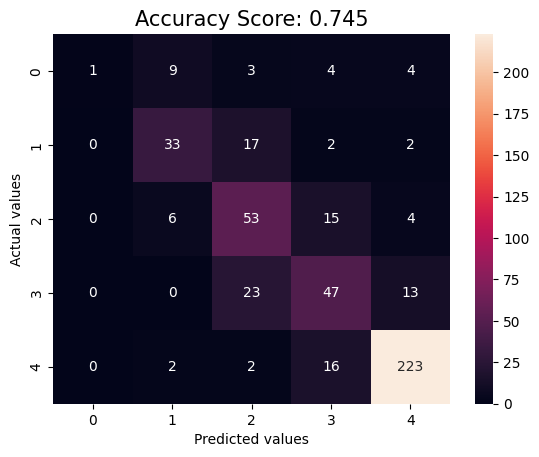

In [32]:
best_model = SVC()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show();

Let's do tuning for Logistic Regression

In [89]:
def Tuning(grid, model, X_Train = X_train, X_Test = X_test, y_Test= y_test, y_Train= y_train):
    np.random.seed(42)
    print('WE are starting with Tuning module')

    Random_Search = RandomizedSearchCV(model,
                                       param_distributions=grid,
                                       n_iter= 2000,
                                       verbose= True,
                                       n_jobs= -1)
    
    Random_Search.fit(X_Train, y_Train)

    print(Random_Search.best_params_)

    score = Random_Search.score(X_Test, y_Test)
    print(f"Accuracy: {score}")
    return score

Storing the adjustable hyperparmeters for the models

In [99]:
# Logistic Regression Grid
lr_grid = {"C" : np.logspace(-4, 4, 500),
            "solver": ['liblinear', 'lbfs', 'saga', 'sag', 'newton-cg'],
            "penalty": ['l1', 'l2']}

# Random Forest Regression Grid
rf_grid = {
    "n_estimators": [25, 50, 100, 150, 200],
    "max_features": ['sqrt', 'log2', 'None'],
    "max_depth": [None, 3, 6, 15, 30],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Decision Tree Grid
dc_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ['best', 'random'],
    "max_depth": [None, 3, 6, 15, 30],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# ADA Boost Grid
ADA_grid = {
    "n_estimators": [25, 40, 50, 60, 75, 90, 100, 120, 180, 200],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 1, 2],
}

# XG Boost Grid
XG_grid = {
    "n_estimators": [100, 150, 200, 250, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1, 2],
    "booster": ['gbtree', 'gblinear', 'dart'],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [0.2, 0.5, 1],
    "base_score": [0.2, 0.5, 1]
}

# Gradient Grid
Gradient_grid = {
    "loss": ['log_loss', 'exponential'],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1, 2],
    "n_estimators": [100, 120, 140, 150, 180, 200, 250, 300],
    "criterion": ['friedman_mse', 'squared_error'],
    "max_depth": [None, 3, 6, 15, 30],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# SVC Grid
SVC_grid = {
    "kernel": ['linear', 'rbf', 'poly'],
    "gamma" : [0, 0.1, 0.2, 0.5, 1, 5, 10],
    "C": [0.1, 0.5, 1, 5, 10],
    "degree": range(0, 7, 1),
}

# KNN Grid
KNN_grid = {
    "n_neighbors": range(1, 30, 1),
    "leaf_size": range(1, 50, 1),
    "p": [1, 2],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [90]:
LR_score = Tuning(model= LogisticRegression(),
                  grid= lr_grid)

WE are starting with Tuning module
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
{'solver': 'saga', 'penalty': 'l1', 'C': 0.7041989785449289}
Accuracy: 0.732776617954071


In [91]:
Rf_score = Tuning(model = RandomForestClassifier(),
                  grid= rf_grid)

WE are starting with Tuning module
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
{'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': None}
Accuracy: 0.7139874739039666


In [94]:
DT_score = Tuning(model= DecisionTreeClassifier(),
                  grid = dc_grid)

WE are starting with Tuning module
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
{'splitter': 'random', 'min_samples_split': 12, 'min_samples_leaf': 11, 'max_depth': 30, 'criterion': 'gini'}
Accuracy: 0.6826722338204593


In [96]:
ADA_Score = Tuning(model = AdaBoostClassifier(),
                   grid= ADA_grid)

WE are starting with Tuning module
Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'n_estimators': 75, 'learning_rate': 0.2}
Accuracy: 0.6868475991649269


In [103]:
# XG_score = Tuning(model = XGBClassifier(),
#                   grid = XG_grid)

# Had to stop it, will try running it using GPU, almost went on for 42 mins

In [102]:
# Gradient_Score = Tuning(model = GradientBoostingClassifier(),
#                         grid = Gradient_grid)

# This as well we will try on GPU, coz xgboost is derived from it.

In [104]:
SVC_score = Tuning(model = SVC(),
                   grid = SVC_grid)

WE are starting with Tuning module
Fitting 5 folds for each of 735 candidates, totalling 3675 fits


KeyboardInterrupt: 

In [ ]:
KNN_score = Tuning(model= KNeighborsClassifier(),
                   grid = KNN_grid)